# Ford GoBike System Data
## by Urmil Tamboli

## Investigation Overview
> In this investigation ,I'lll look at the customer behvavior. The main focus will be on duration of trip and type of customer.

## Dataset Overview
> - This dataset includes information about individual rides made in a bike-sharing system covering the greater San Fransisco Bay area.
- The source of this data can be found at the following website: https://s3.amazonaws.com/baywheels-data/index.html
- This dataset has 2194715 rows nd 15 columns.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clean_merged_data.csv')

## Type of user

> Ford GoBike has Customers and Subscribers. The customers has single access benefit while the subscribers has monthly membership. The data shows only 11.3% are customers while the majority of 88.7% are subscribers.

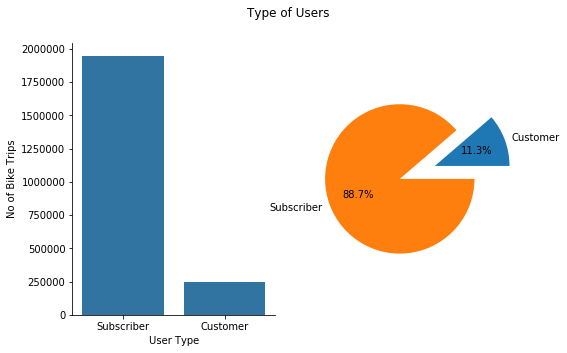

In [23]:
#calculating proportion of user types
subscriber_prop = df.query('user_type=="Subscriber"').shape[0]/df.shape[0]
customer_prop = df.query('user_type=="Customer"').shape[0]/df.shape[0]

plt.figure(figsize = [8, 5])
plt.rc('axes.spines', top = False, right = False)

# code for the bar chart
plt.subplot(1, 2, 1)

g = sb.countplot(data=df, x="user_type", order=df.user_type.value_counts().index, color = sb.color_palette()[0])
g.set_xlabel('User Type')
g.set_ylabel('No of Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_prop, subscriber_prop]
explode = (0, 0.5)

plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
plt.axis('equal')

plt.suptitle('Type of Users');

## Trip duration of user types

> There is a major difference in the average duration of trip between the customer and subscribers. Customers have long duration trips while Subscribers have short duration trips. This says that customer tend to go outside for a long time mmaybe cause of good weather and have fun on the weekends while the subscribers have low trip duration which tells us that they use for school or work purpose which is short distanced.

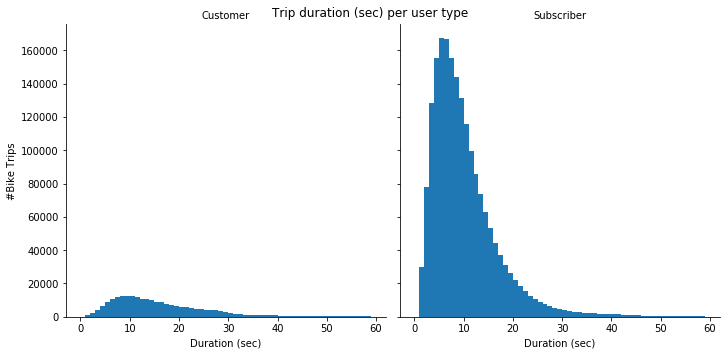

In [7]:
# code for the (histogram) duration (sec) distribution per user type

base_color = sb.color_palette()[0]

g = sb.FacetGrid(df, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0,60,1)
g.map(plt.hist, "duration_min", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) per user type');

## Weekly behaviour of the customers
- From the heatmap below, we can find the difference in biking habits of the customer and subscriber. From this chart we can say that customers use it for leisure while subscribers use it for commute.
- Customers use the bike more on weekends with peak on weekdays during 8-9 in the morning and 5-6 in the evening and 12-2 pm on the weekends. This shows that customers rent bike for leisure and long rides in the summer.
- Subscribers use the bike more on the weekdays on the office peak time of 8-9am and 5-6 pm. There is significant reduction in renting during the weekends with no significant peak.


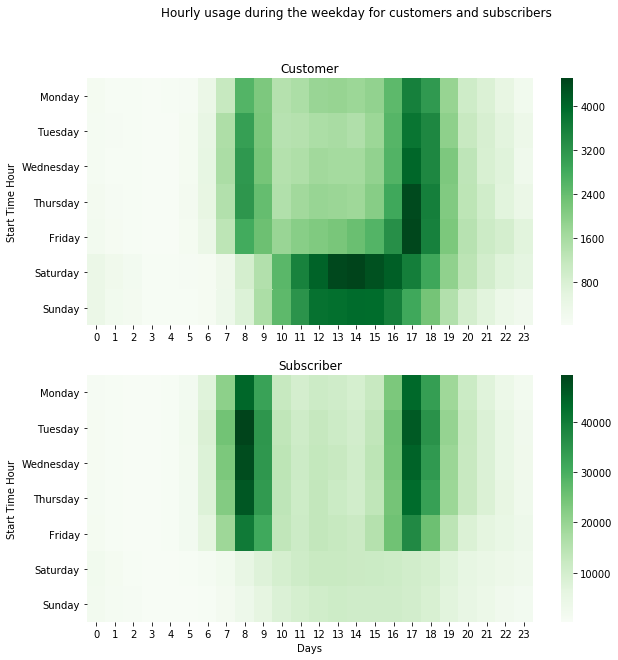

In [34]:
df['trip_day'] = pd.Categorical(df['trip_day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
plt.figure(figsize=(10,10))
plt.suptitle('Hourly usage during the weekday for customers and subscribers')

# heatmap for customers
plt.subplot(2,1 , 1)
df_cust = df.query('user_type == "Customer"').groupby(["trip_hour", "trip_day"])["bike_id"].size().reset_index()
df_cust = df_cust.pivot("trip_day","trip_hour", "bike_id")
sb.heatmap(df_cust, cmap='Greens')

plt.title("Customer")
plt.xlabel('')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(2, 1, 2)
df_subs = df.query('user_type == "Subscriber"').groupby(["trip_hour", "trip_day"])["bike_id"].size().reset_index()
df_subs = df_subs.pivot( "trip_day","trip_hour", "bike_id")
sb.heatmap(df_subs, cmap="Greens")

plt.title("Subscriber")
plt.xlabel('Days')
plt.ylabel('Start Time Hour');

## Summary
> From the above visvualizations, we can see that the number of customers ride bike are less while the number of subscribers ride bike are more while its the opposite for average time duration with subscribers has short duration trip while customers has long duration trip. Also the customers tend to ride on weekends while subscribers who mostly commute to work or school don't rent the bike on the weekend. 